28.540693779539442
27.551195581165288
21.459306220460558
22.25447503836645


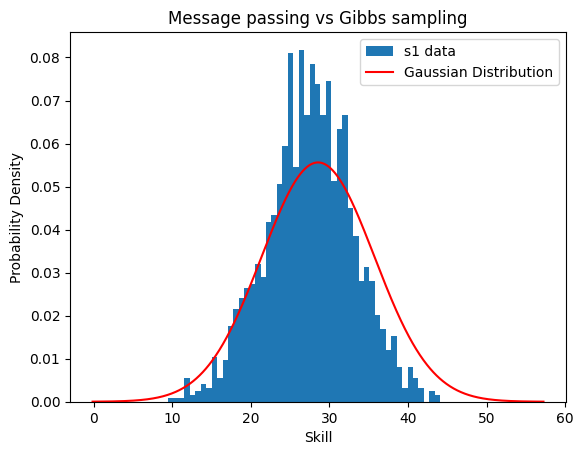

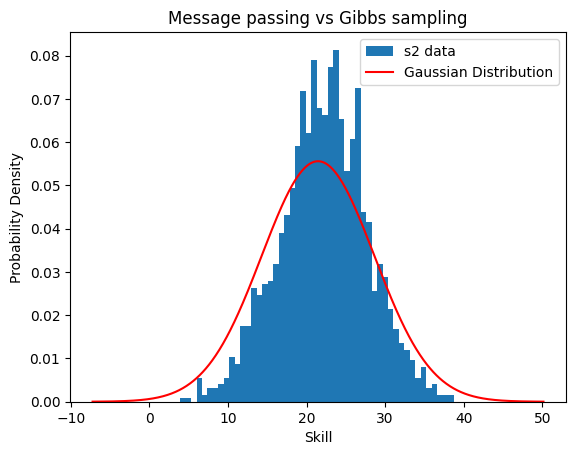

In [3]:
#!/usr/bin/env python3
import numpy as np
from scipy . stats import truncnorm
import matplotlib.pyplot as plt
from Preprocessing_serieA_function import preprocess_serieA_no_draws
from Gibbs_sampler_function import gibbs_sampling
from scipy.stats import norm
import scipy.stats as stats
def mutiplyGauss (m1 , s1 , m2 , s2):
    # computes the Gaussian distribution N(m,s) being propotional to N(m1 ,s1)*N(m2 ,s2)
    #
    # Input :
    # m1 , s1: mean and variance of first Gaussian
    # m2 , s2: mean and variance of second Gaussian
    #
    # Output :
    # m, s: mean and variance of the product Gaussian

    s = 1/(1/ s1 +1/ s2)
    m = (m1/s1+m2/s2)*s
    return m, s
def divideGauss (m1 , s1 , m2 , s2):
    # computes the Gaussian distribution N(m,s) being propotional to N(m1 ,s1)/N(m2 ,s2)
    #
    # Input :
    # m1 , s1: mean and variance of the numerator Gaussian
    # m2 , s2: mean and variance of the denominator Gaussian
    #
    # Output :
    # m, s: mean and variance of the quotient Gaussian

    m, s = mutiplyGauss (m1 , s1 , m2 , -s2)
    return m, s

def truncGaussMM (a, b, m0 , s0):
    # computes the mean and variance of a truncated Gaussian distribution
    #
    # Input :
    # a, b: The interval [a, b] on which the Gaussian is being truncated
    # m0 ,s0: mean and variance of the Gaussian which is to be truncated
    #
    # Output :
    # m, s: mean and variance of the truncated Gaussian
    # scale interval with mean and variance
    a_scaled , b_scaled = (a - m0) / np.sqrt(s0), (b - m0) / np.sqrt(s0)
    m = stats.truncnorm.mean(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    s = stats.truncnorm.var(a_scaled, b_scaled, loc=m0, scale=np.sqrt(s0))
    return m, s

#messages are denoted as mu_#
#Initial variables
prior_s1_mean=25
prior_s2_mean=25

prior_s1_var=30
prior_s2_var=30

prior_s3_var=10

s1 = 25
s2 = 25


y=1

#factor functions 
factor_s1_mean=prior_s1_mean
factor_s2_mean=prior_s2_mean
factor_s2_var=100

#messages
mu_1_mean=prior_s1_mean
mu_1_var=prior_s1_var
mu_2_mean=prior_s1_mean
mu_2_var=prior_s1_var

mu_3_mean=prior_s2_mean
mu_3_var=prior_s2_var
mu_4_mean=prior_s2_mean
mu_4_var=prior_s2_var

mu_6_mean=prior_s1_mean-prior_s2_mean
mu_6_var=prior_s1_var+prior_s2_var+prior_s3_var

if y == 1:
    a, b = 0, np.Inf
else:
    a, b = np.NINF , 0

#here we find the mean and variance of the truncated based on the result of the game

qt_m , qt_v = truncGaussMM (a, b, mu_6_mean , mu_6_var)

mu_9_mean,mu_9_var=divideGauss(qt_m,qt_v,mu_6_mean,mu_6_var)

mu_10_mean=mu_9_mean+prior_s2_mean
mu_10_var=mu_9_var+prior_s3_var+ prior_s2_var

mu_5_mean=-mu_9_mean+prior_s1_mean
mu_5_var=mu_9_var+prior_s3_var+ prior_s1_var


p_mean_s1_t,p_var_s1_t=mutiplyGauss(mu_1_mean,mu_1_var,mu_10_mean,mu_10_var)
p_mean_s2_t,p_var_s2_t=mutiplyGauss(mu_5_mean,mu_5_var,mu_4_mean,mu_4_var)

s1_s2_mean_col = np.array([[prior_s1_mean, prior_s2_mean]]).reshape(-1,1)
s_cov_matrix = np.array([[prior_s1_var, 0], [0, prior_s2_var]])
s1_gibbs,s2_gibbs=gibbs_sampling(10000,s1_s2_mean_col,s_cov_matrix,prior_s3_var,1,False)



plt.hist(s1_gibbs[500:], bins=50, density=True, label=f'Gibbs Sampling')
# plt.hist(s2_gibbs[200:], bins=50, color='red', alpha=0.7)
# plt.show()
print(p_mean_s1_t)
print(p_var_s1_t)
print(np.mean(s1_gibbs[500:]))
print(np.var(s1_gibbs[500:]))
print()
print()
print(p_mean_s2_t)
print(np.mean(s2_gibbs[500:]))
print(p_var_s2_t)
print(np.var(s2_gibbs[500:]))
# mean = 0  # Mean (μ)
# variance = 1  # Variance (σ²)
x = np.linspace(0, p_mean_s1_t + 4 * np.sqrt(p_var_s1_t), 1000)  # Adjust the range as needed
y = norm.pdf(x, loc=p_mean_s1_t, scale= np.sqrt(p_var_s1_t))
plt.plot(x, y,color='r', label='Message Passing')
plt.title('S1')
plt.xlabel('Skill')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


x = np.linspace(p_mean_s2_t- 4 * np.sqrt(p_var_s2_t), p_mean_s2_t + 4 * np.sqrt(p_var_s2_t), 1000)  # Adjust the range as needed
y = norm.pdf(x, loc=p_mean_s2_t, scale= np.sqrt(p_var_s2_t))
plt.hist(s2_gibbs[500:], bins=50, density=True, label=f'Gibbs Sampling')
plt.plot(x, y,color='r', label='Message Passing')
plt.title('S2')
plt.xlabel('Skill')
plt.ylabel('Probability Density')
plt.legend()
plt.show()